In [172]:
import numpy as np
import math as mp

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['savefig.dpi'] = 500

def bestSaveFig(name):
    plt.savefig(name, bbox_inches = 'tight', pad_inches = 0.1)

#\left(\right)

In [71]:
def custom_step_function(x):
    result = np.where(x < 0, 1, np.where(x > 0, 0, 0.5))
    return result

def parameterize_curve(x, y, pointSpace):
    # Step 1: Calculate arc length between consecutive points
    dx = np.diff(x)
    dy = np.diff(y)
    segment_lengths = np.sqrt(dx**2 + dy**2)
    arc_lengths = np.concatenate(([0], np.cumsum(segment_lengths)))
    
    # Step 2: Total length and number of output points
    total_length = arc_lengths[-1]
    num_points = int(np.floor(total_length / pointSpace)) + 1
    uniform_arc_lengths = np.linspace(0, total_length, num_points)
    
    # Step 3: Interpolate x and y based on arc length
    x_new = np.interp(uniform_arc_lengths, arc_lengths, x)
    y_new = np.interp(uniform_arc_lengths, arc_lengths, y)
    
    return x_new, y_new

import numpy as np

def compute_normals(x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    # Compute tangent vectors using central differences
    dx = np.gradient(x)
    dy = np.gradient(y)
    
    # Normalize tangents
    tangent_mags = np.sqrt(dx**2 + dy**2)
    tx = dx / tangent_mags
    ty = dy / tangent_mags

    # Rotate tangents by 90° to get normals
    nx = -ty
    ny = tx
    
    normals = np.stack((nx, ny), axis=-1)  # shape (N, 2)
    return normals

def offset_curve_by_normals(x, y, thickness):
    normals = compute_normals(x, y)
    x_offset = x + thickness * normals[:, 0]
    y_offset = y + thickness * normals[:, 1]
    return x_offset, y_offset

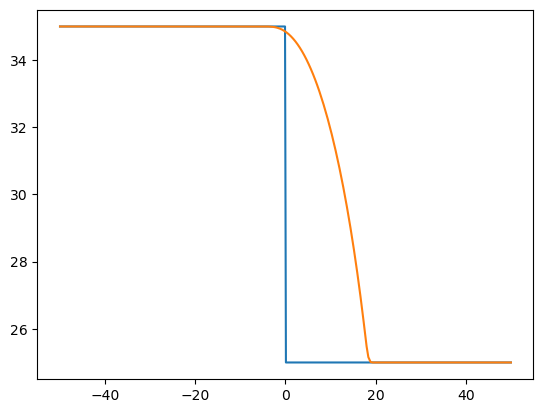

In [177]:
vec = np.linspace(-50,50,num=1001)
step = 10 * custom_step_function(vec)
step1 = 10 * custom_step_function(vec+10)
step2 = 10 - 10 * custom_step_function(vec-10)
stept = step1 + step2
dthickness = 5e-5
dParam = 5e-1

totThickness = 25
iterations = int(totThickness / dthickness)

x = vec
y = step

for counter in range(iterations):
    x, y = parameterize_curve(x, y, dParam)
    x, y = offset_curve_by_normals(x, y, dthickness)

plt.plot(vec, step + totThickness)
#plt.plot(vec, stept + totThickness)
plt.plot(x, y)
plt.show()

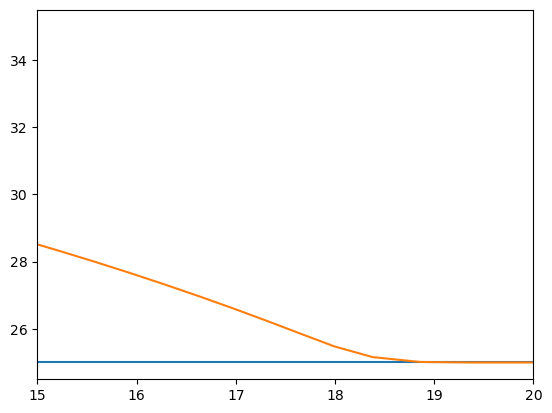

In [176]:
plt.plot(vec, step + totThickness)
plt.plot(x, y)
plt.xlim((15,20))
plt.show()